In [1]:
using LinearAlgebra, Kronecker, Random, BlockDiagonals, PyPlot

In [2]:
eye(T::Type, n) = Diagonal{T}(I, n)
eye(n) = eye(Float64, n)
vec(X) = vcat(X...)

vec (generic function with 1 method)

In [3]:
n = 4 # number of dims
i = 0.25 # kgm^2, 
b = 0.2 # kgm^2/s
ta = 0.03 # s
te = 0.04 # s
L0 = 0.35 # m

bu = 1 / (ta * te * i)
α1 = bu * b
α2 = 1/(ta * te) + (1/ta + 1/te) * b/i
α3 = b/i + 1/ta + 1/te

A = [zeros(3) eye(3); -[0, α1, α2, α3]']
B = [zeros(3); bu]
C = [eye(3) zeros(3)]
D = Diagonal([1e-3, 1e-2, 5e-2])

Y = 0.02 * B
G = 0.03 * eye(n)

Q = Diagonal([1.0, 0.01, 0, 0]) 
R = 0.0001
U = Diagonal([1.0, 0.1, 0.01, 0]);

In [4]:
maxiter = 1000
eps = 1e-8

# initialize
L = rand(n)' # Feedback gains
K = rand(n, 3) # Kalman gains
I2n = eye(2n)

8×8 Diagonal{Float64, Vector{Float64}}:
 1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0

In [5]:
Ā = [A-B*L B*L; zeros(size(A)) (A-K*C)]
Ȳ = [-ones(2) ones(2)] ⊗ (Y*L) 
Ḡ = [G zeros(size(K)); G (-K*D)]
V = BlockDiagonal([Q, U]) + [1 -1; -1 1] ⊗ (L'* R * L)

8×8 Matrix{Float64}:
  1.00006      6.72676e-5   4.29771e-5  …  -4.29771e-5  -5.57975e-5
  6.72676e-5   0.0100822    5.25155e-5     -5.25155e-5  -6.81812e-5
  4.29771e-5   5.25155e-5   3.35521e-5     -3.35521e-5  -4.35608e-5
  5.57975e-5   6.81812e-5   4.35608e-5     -4.35608e-5  -5.65553e-5
 -5.50498e-5  -6.72676e-5  -4.29771e-5      4.29771e-5   5.57975e-5
 -6.72676e-5  -8.21971e-5  -5.25155e-5  …   5.25155e-5   6.81812e-5
 -4.29771e-5  -5.25155e-5  -3.35521e-5      0.0100336    4.35608e-5
 -5.57975e-5  -6.81812e-5  -4.35608e-5      4.35608e-5   5.65553e-5

In [6]:
# update S, P
S = (I2n' ⊗ Ā' +  Ā' ⊗ I2n + Ȳ' ⊗  Ȳ')^-1

64×64 Matrix{Float64}:
 -1.72945       0.5           0.86563      …  -0.0031229     -3.07323
 -1.46691      -0.982564      1.79089         -0.00390102    -3.83896
 -0.519098     -0.897237      0.000310178     -8.98399e-6    -0.00884109
 -0.0002037    -0.000349676   1.09954e-6      -4.21129e-6    -0.0041443
 -0.145996     -1.4511       -0.566495         0.00292        2.87355
  1.05991      -0.516047     -1.65225      …   0.00683748     6.72872
  0.432914      0.811568      0.0190815       -0.000131297   -0.129209
 -0.00122915   -0.00110431    0.000309079      1.89992e-6     0.0018697
 -1.46691       0.982564      0.790888        -0.00390102    -3.83896
 -1.93851      -1.11022e-15   2.16258         -0.00736067    -7.24358
 -1.02085      -0.819133      0.89851      …  -0.00311492    -3.06537
 -0.000399205  -0.000319373   0.000351053     -5.27347e-6    -0.00518958
 -1.06208      -2.01726       0.607572        -0.000988627   -0.972901
  ⋮                                        ⋱           

In [7]:
S = (I2n' ⊗ Ā' +  Ā' ⊗ I2n + Ȳ' ⊗  Ȳ')

64×64 Matrix{Float64}:
 0.0  0.0  0.0  -2473.19   0.0       …     0.0          0.0        2446.66
 1.0  0.0  0.0  -3688.75   0.0             0.0          0.0        2989.67
 0.0  1.0  0.0  -2810.8    0.0             0.0          0.0        1910.1
 0.0  0.0  1.0  -2565.91   0.0             0.0          0.0        2479.89
 0.0  0.0  0.0   2473.19  -0.198614        0.0          0.0       -2446.66
 0.0  0.0  0.0   3022.09   0.719659  …     0.0          0.0       -2989.67
 0.0  0.0  0.0   1930.8   -0.50372         0.0          0.0       -1910.1
 0.0  0.0  0.0   2506.77   0.0             0.0          0.0       -2479.89
 1.0  0.0  0.0      0.0    0.0             0.0          0.0        2989.67
 0.0  1.0  0.0      0.0    0.0             0.0          0.0        3653.2
 0.0  0.0  1.0      0.0    0.0       …     0.0          0.0        2334.02
 0.0  0.0  0.0      1.0    0.0             0.0          0.0        3030.28
 0.0  0.0  0.0      0.0    1.0             0.0          0.0       -2989.67
 ⋮   

In [8]:
# update S, P
S = (Ā')^-1

8×8 adjoint(::Matrix{Float64}) with eltype Float64:
 -1.4915        1.0   0.0   0.0   0.0          …   0.0           0.0
 -1.13651       0.0   1.0   0.0   0.0              0.0           0.0
 -1.03749      -0.0  -0.0   1.0   0.0              0.0           0.0
 -0.000404337   0.0   0.0   0.0   0.0              0.0           0.0
 -0.620077      0.0   0.0   0.0  -0.713633        -0.571995     -0.422216
 -1.72485       0.0   0.0   0.0  -1.15402      …   0.178454     -0.46725
  0.874689     -0.0  -0.0  -0.0  -0.00920272      -0.0399891     0.939655
 -0.00234879    0.0   0.0   0.0  -0.000155627     -0.000676253  -0.00102049

In [9]:
S = ((Ā)')^-1

8×8 adjoint(::Matrix{Float64}) with eltype Float64:
 -1.4915        1.0   0.0   0.0   0.0          …   0.0           0.0
 -1.13651       0.0   1.0   0.0   0.0              0.0           0.0
 -1.03749      -0.0  -0.0   1.0   0.0              0.0           0.0
 -0.000404337   0.0   0.0   0.0   0.0              0.0           0.0
 -0.620077      0.0   0.0   0.0  -0.713633        -0.571995     -0.422216
 -1.72485       0.0   0.0   0.0  -1.15402      …   0.178454     -0.46725
  0.874689     -0.0  -0.0  -0.0  -0.00920272      -0.0399891     0.939655
 -0.00234879    0.0   0.0   0.0  -0.000155627     -0.000676253  -0.00102049

In [10]:
P = reshape((I2n' ⊗ Ā +  Ā ⊗ I2n + Ȳ ⊗  Ȳ)^-1 * vec(-Ḡ * Ḡ'), (2n, 2n))

8×8 Matrix{Float64}:
  0.0154873    -0.00045      -0.0122889    …   0.00151315    0.000986847
 -0.00045       0.0122889    -0.00045          4.50977e-5    0.000994369
 -0.0122889    -0.00045       0.0142709       -0.000258545   0.00211143
  0.00045      -0.0142709    -0.00045         -0.00288489    0.0871396
  0.00168561    0.00169581    0.000463926      2.35117e-5    0.00139105
 -0.00208267   -0.000145066   0.000284365  …  -0.000996517  -0.0022848
  0.00151315    4.50977e-5   -0.000258545      0.000951631  -0.00127421
  0.000986847   0.000994369   0.00211143      -0.00127421    0.0951742

In [11]:
# update K, L
P22 = P[n+1:2n, n+1:2n]
S11 = S[1:n, 1:n]
S22 = S[n+1:2n, n+1:2n]

4×4 Matrix{Float64}:
 -0.713633      0.792232     -0.571995     -0.422216
 -1.15402      -0.193584      0.178454     -0.46725
 -0.00920272   -0.0305299    -0.0399891     0.939655
 -0.000155627  -0.000516289  -0.000676253  -0.00102049

In [12]:
Ktm1 = copy(K)
Ltm1 = copy(L)

1×4 adjoint(::Vector{Float64}) with eltype Float64:
 0.741956  0.906626  0.579241  0.752032

In [13]:
K = P22 * C' * (D * D')^-1
L = (R + Y' * (S11 + S22) * Y)^-1 * B' * S11

1×4 adjoint(::Vector{Float64}) with eltype Float64:
 0.297171  0.0  0.0  0.0

In [14]:
for i in 1:maxiter
    Ā = [A-B*L B*L; zeros(size(A)) (A-K*C)]
    Ȳ = [-ones(2) ones(2)] ⊗ (Y*L) 
    Ḡ = [G zeros(size(K)); G (-K*D)]
    V = BlockDiagonal([Q, U]) + [1 -1; -1 1] ⊗ (L'* R * L)
    
    # update S, P
    S = -reshape((I2n' ⊗ Ā' +  Ā' ⊗ I2n + Ȳ' ⊗  Ȳ')^-1 * vec(V), (2n, 2n))
    P = -reshape((I2n' ⊗ Ā +  Ā ⊗ I2n + Ȳ ⊗  Ȳ)^-1 * vec(Ḡ * Ḡ'), (2n, 2n))

    # update K, L
    P22 = P[n+1:2n, n+1:2n]
    S11 = S[1:n, 1:n]
    S22 = S[n+1:2n, n+1:2n]

    Ktm1 = copy(K)
    Ltm1 = copy(L)

    K = P22 * C' * (D * D')^-1
    L = (R + Y' * (S11 + S22) * Y)^-1 * B' * S11
    if sum(abs.(K - Ktm1)) < eps && sum(abs.(L - Ltm1)) < eps
        break
    end
end

In [15]:
dt = 0.001 # sec
T = 2.0 # sec
nt = round(Int, T/dt)
Xa = zeros(4, nt)
ua = zeros(nt)
Xa[1, 1] = -0.5 # m; initial position (target position is zero)

for k=1:nt-1
    ua[k] = -L * Xa[:, k]
    Xa[:, k+1] = Xa[:,k] + (A * Xa[:,k] + B * ua[k]) * dt
end

In [16]:
sqrtdt = √dt
nsim = 10
XSimAll = zeros(nsim, 4, nt)
uSimAll = zeros(nsim, nt)
for i in 1:nsim
    XSim = zeros(4, nt)
    Xhat = zeros(4, nt)
    u = zeros(nt)
    XSim[1, 1] = -0.5 # m; initial position (target position is zero)
    Xhat[1, 1] = XSim[1, 1]
    
    for k=1:nt-1
        u[k] = -L * Xhat[:, k]
        XSim[:, k+1] = XSim[:,k] + (A * XSim[:,k] + B * u[k]) * dt + sqrtdt * (Y * u[k] * randn() + G * randn(n))
        dy = C * XSim[:,k] * dt + D * sqrtdt * randn(n-1)
        Xhat[:, k+1] = Xhat[:,k] + (A * Xhat[:,k] + B * u[k]) * dt + K * (dy - C * Xhat[:,k] * dt)
    end
    XSimAll[i,:,:] = XSim
    uSimAll[i, :] = u
end

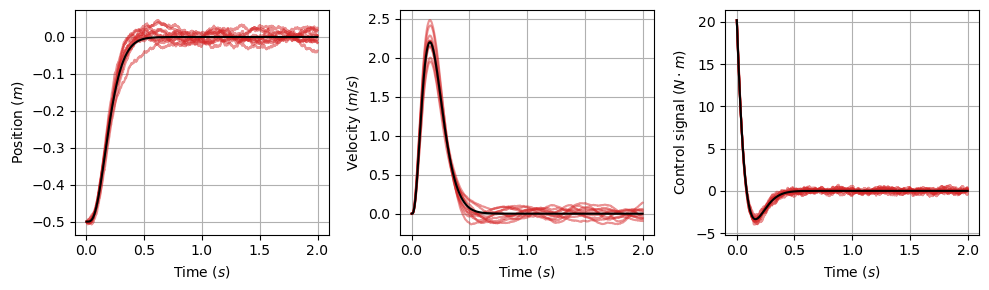

In [17]:
tarray = (1:nt) * dt
label = [L"Position ($m$)", L"Velocity ($m/s$)", L"Acceleration ($m/s^2$)", L"Jerk ($m/s^3$)"]
figure(figsize=(10, 3))
for i in 1:2
    subplot(1,3,i)
    plot(tarray, XSimAll[:,i,:]', "tab:red", alpha=0.5)
    plot(tarray, Xa[i,:], "k")
    ylabel(label[i]); grid()
    xlabel(L"Time ($s$)")
end
subplot(1,3,3)
plot(tarray, uSimAll', "tab:red", alpha=0.5)
plot(tarray, ua, "k")
ylabel(L"Control signal ($N\cdot m$)"); grid()
xlabel(L"Time ($s$)")
tight_layout()